In [69]:
from standardInclude import *

In [70]:
f = r.TFile("./data/gm2offline_ana_18398265_1544564276.1650.root")
f = r.TFile("./data/results_40M_gasGun_May1.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries : 39960000 : Total =     23789293449 bytes  File  Size = 10443385936 *
*        :          : Tree compression factor =   2.28                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries : 39960000 : Total  Size=  160101311 bytes  File Size  =    1123947 *
*Baskets :     2534 : Basket Size=    1038848 bytes  Compression= 142.40     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries : 39960000 : Total  Size=  160108925 bytes  File Size  =    1125578 *
*Baskets :     2534 : Basket Size=    1038848 bytes  Compression= 142.20     *
*..............................................

---

### Lets look at the theta variable first

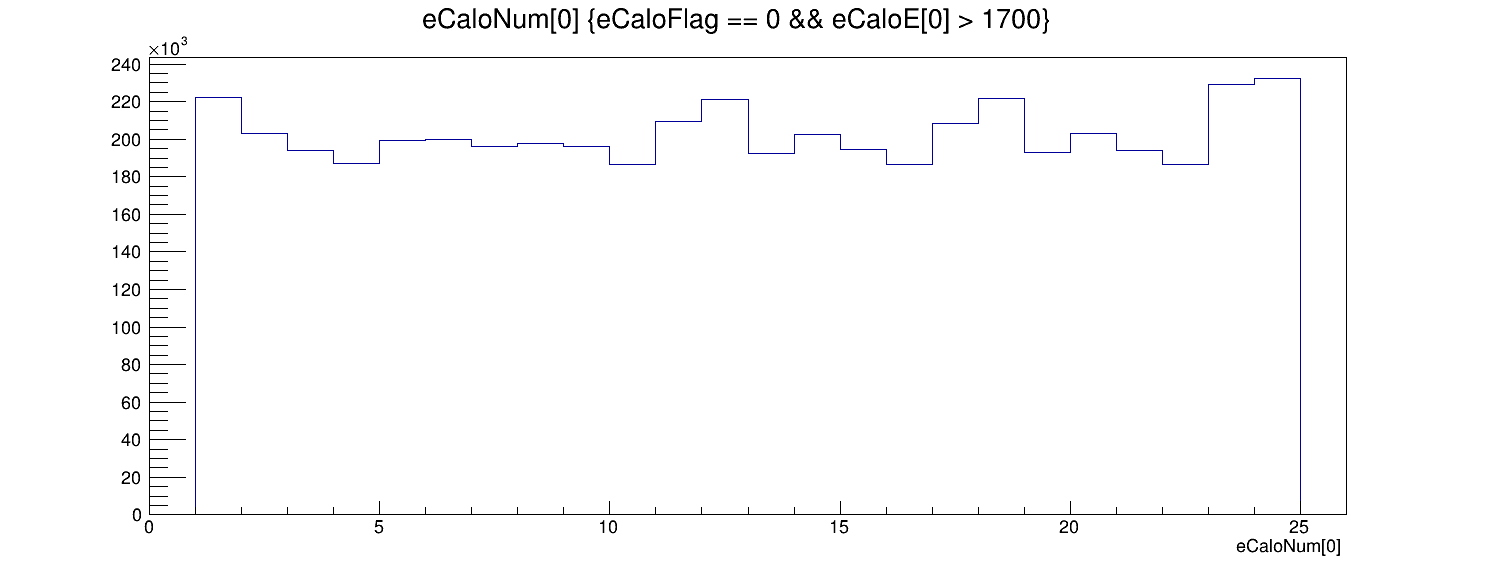

In [71]:
c = r.TCanvas("c","c",1500,600)
t.Draw("eCaloNum[0]","eCaloFlag == 0 && eCaloE[0] > 1700","")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


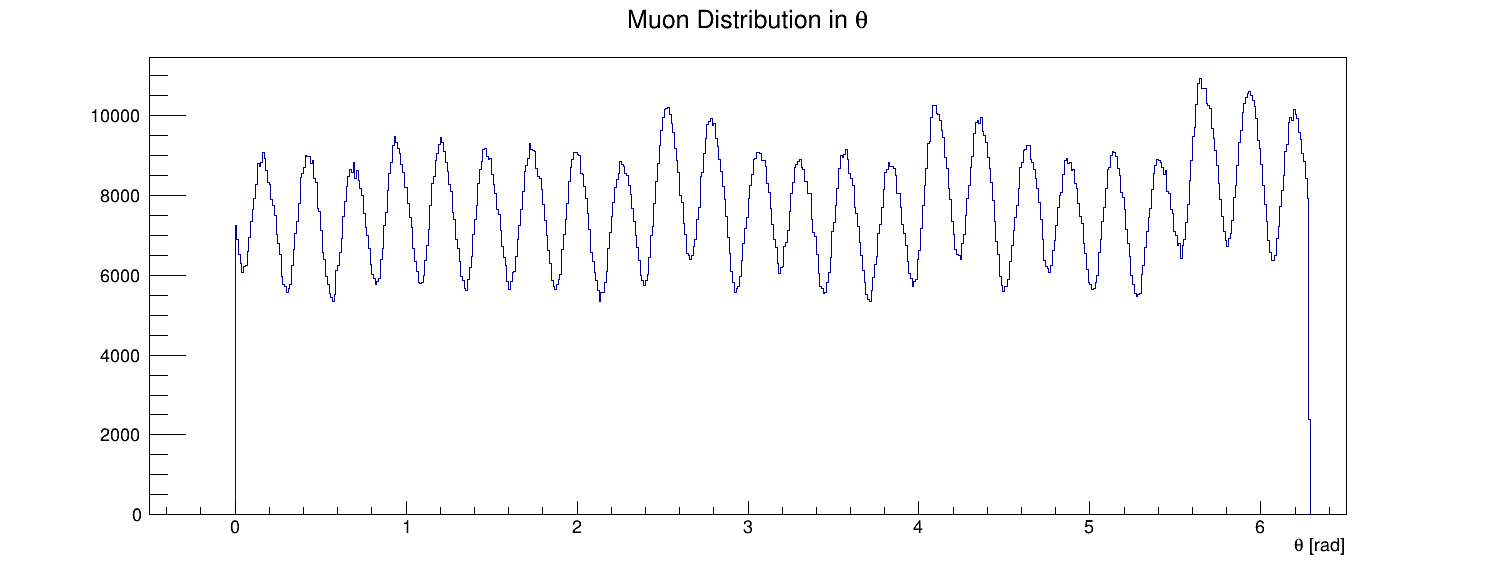

In [72]:
c = r.TCanvas("c","c",1500,600)
h = r.TH1D("h","Muon Distribution in #theta; #theta [rad]",700,-0.50,6.5)
t.Draw("muDecayTheta>>h","eCaloFlag == 0 && eCaloE[0] > 1700","goff")
h.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


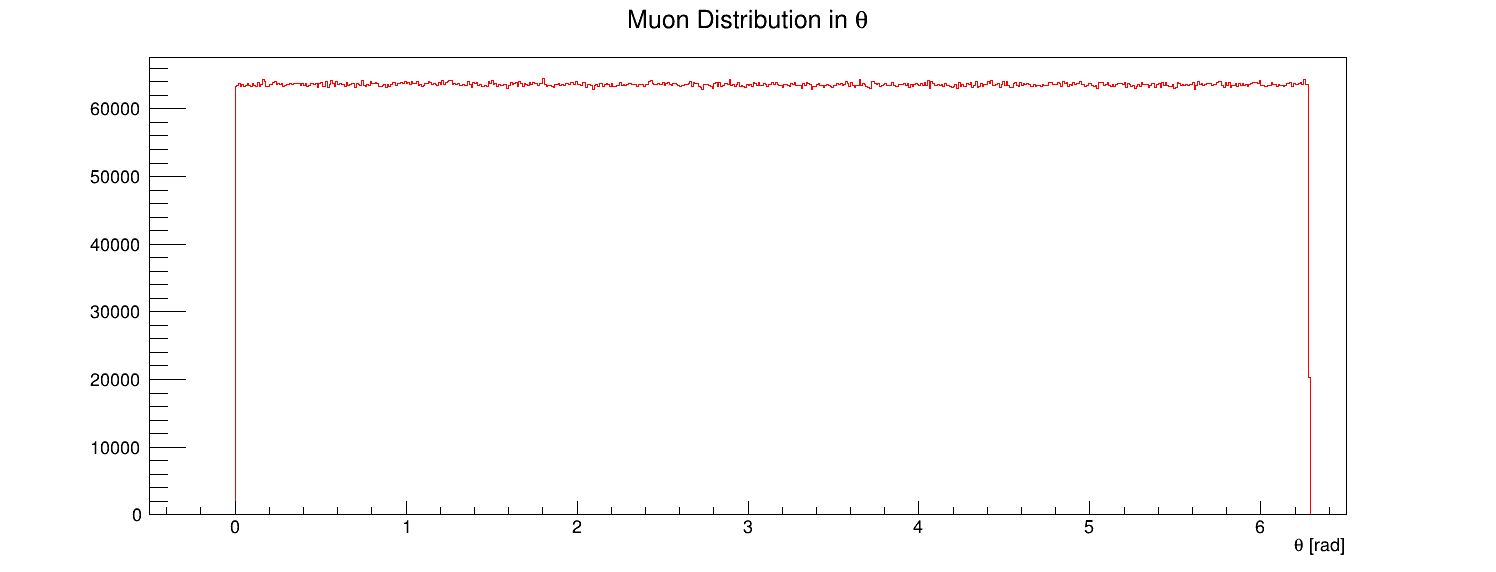

In [73]:
c = r.TCanvas("c","c",1500,600)
h2 = h.Clone("h2")
h2.Reset()
h2.SetLineColor(2)
t.Draw("muDecayTheta>>h2","")
h2.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


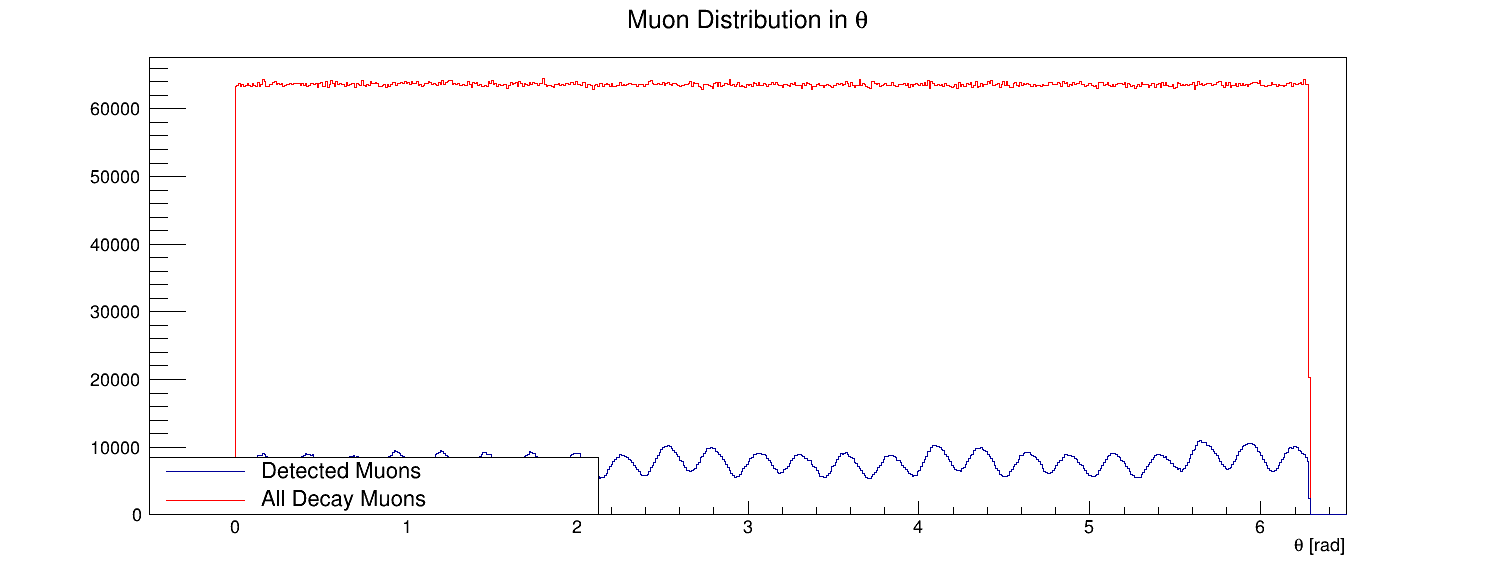

In [74]:
c = r.TCanvas("c","c",1500,600)

h2.Draw()
#h2.GetYaxis().SetRangeUser(-100,750)
h.Draw("SAME")

leg = r.TLegend(0.1,0.1,0.4,0.2)
leg.AddEntry(h,"Detected Muons","l")
leg.AddEntry(h2,"All Decay Muons","l")
leg.Draw()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


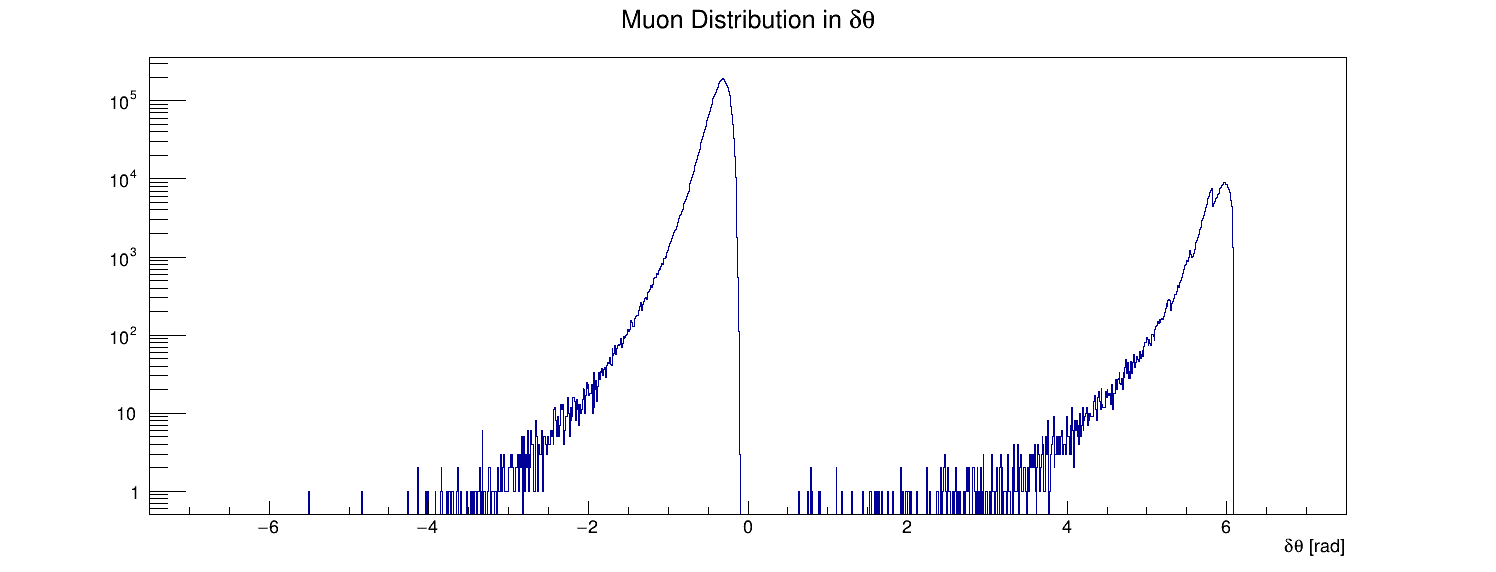

In [75]:
c = r.TCanvas("c","c",1500,600)
h3 = r.TH1D("h3","Muon Distribution in #delta#theta; #delta#theta [rad]",1400,-7.5,7.5)
t.Draw("muDecayTheta-eCaloTheta[0]>>h3","eCaloFlag == 0 && eCaloE[0] > 1700","goff")
h3.Draw()
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).


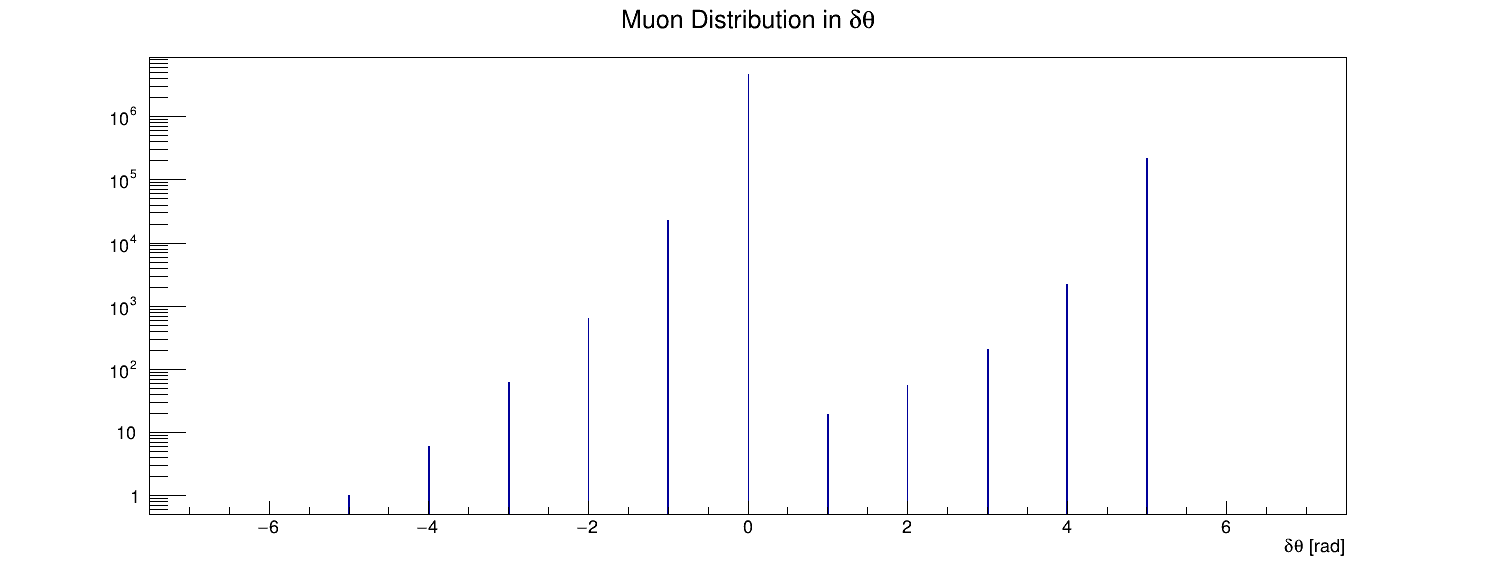

In [76]:
c = r.TCanvas("c","c",1500,600)
h3 = r.TH1D("h3","Muon Distribution in #delta#theta; #delta#theta [rad]",1400,-7.5,7.5)
t.Draw("(muDecayTheta-eCaloTheta[0])%(2*TMath::Pi())>>h3","eCaloFlag == 0 && eCaloE[0] > 1700","goff")
h3.Draw()
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).


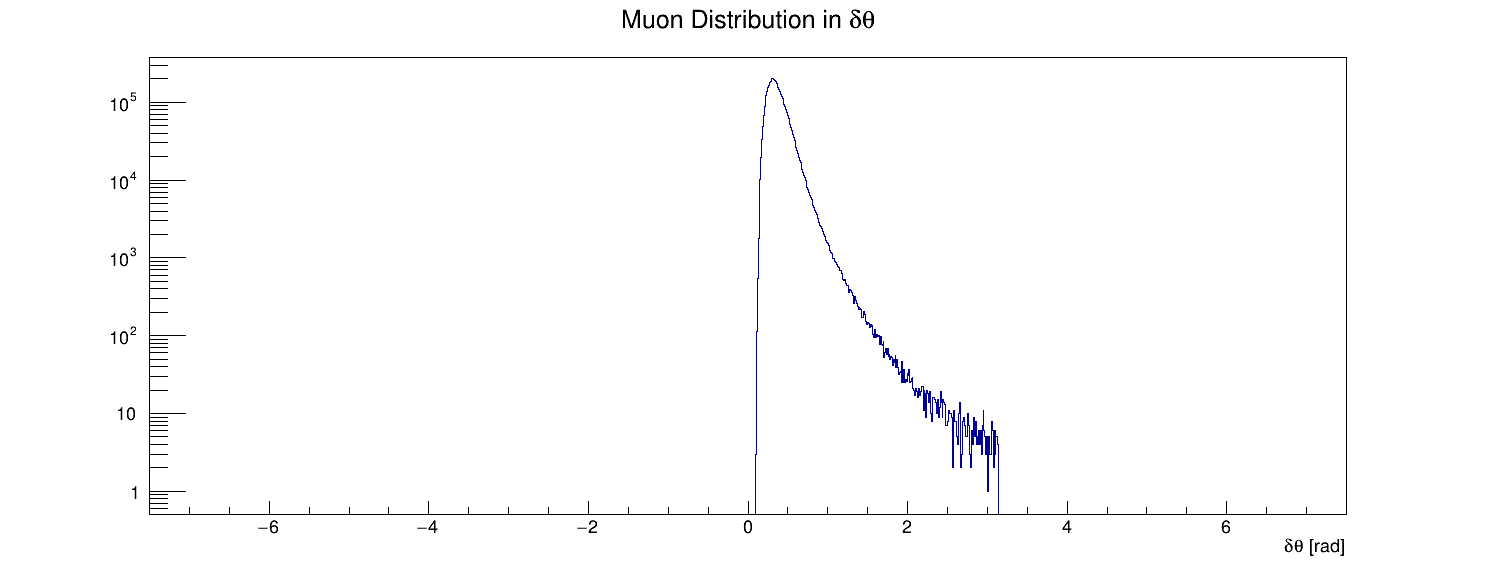

In [77]:
c = r.TCanvas("c","c",1500,600)
h3 = r.TH1D("h3","Muon Distribution in #delta#theta; #delta#theta [rad]",1400,-7.5,7.5)
t.Draw("(TMath::Pi() - TMath::Abs(TMath::Abs(muDecayTheta -eCaloTheta[0]) - TMath::Pi()))>>h3","eCaloFlag == 0 && eCaloE[0] > 1700","goff")
h3.Draw()
c.SetLogy()
c.Draw()

In [78]:
deltaThetaByCaloVec = []

for calo in range(1,25):
    print("Starting Calo", calo)
    hi = r.TH1D("hi","Muon Distribution in |#delta#theta| For Calo "+str(calo)+"; |#delta#theta| [rad]",1400,-7,7)
    t.Draw("(TMath::Pi() - TMath::Abs(TMath::Abs(muDecayTheta -eCaloTheta[0]) - TMath::Pi()))>>hi",
           "eCaloFlag == 0 && eCaloE[0] > 1700 && eCaloNum[0] == "+str(calo),
           "goff")
    hi.SetLineColor(calo+28)
    deltaThetaByCaloVec.append(hi.Clone("hDeltaTheta_"+str(calo)))

Starting Calo 1
Starting Calo 2
Starting Calo 3
Starting Calo 4
Starting Calo 5
Starting Calo 6
Starting Calo 7
Starting Calo 8
Starting Calo 9
Starting Calo 10
Starting Calo 11
Starting Calo 12
Starting Calo 13
Starting Calo 14
Starting Calo 15
Starting Calo 16
Starting Calo 17
Starting Calo 18
Starting Calo 19
Starting Calo 20
Starting Calo 21
Starting Calo 22
Starting Calo 23
Starting Calo 24


Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

In [79]:
print([x.GetEntries() for x in deltaThetaByCaloVec])

[222434.0, 202804.0, 194206.0, 186960.0, 199207.0, 199915.0, 196125.0, 197980.0, 195903.0, 186728.0, 209313.0, 221229.0, 192503.0, 202430.0, 194463.0, 186584.0, 208604.0, 221768.0, 192990.0, 203187.0, 194106.0, 186703.0, 228935.0, 232076.0]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


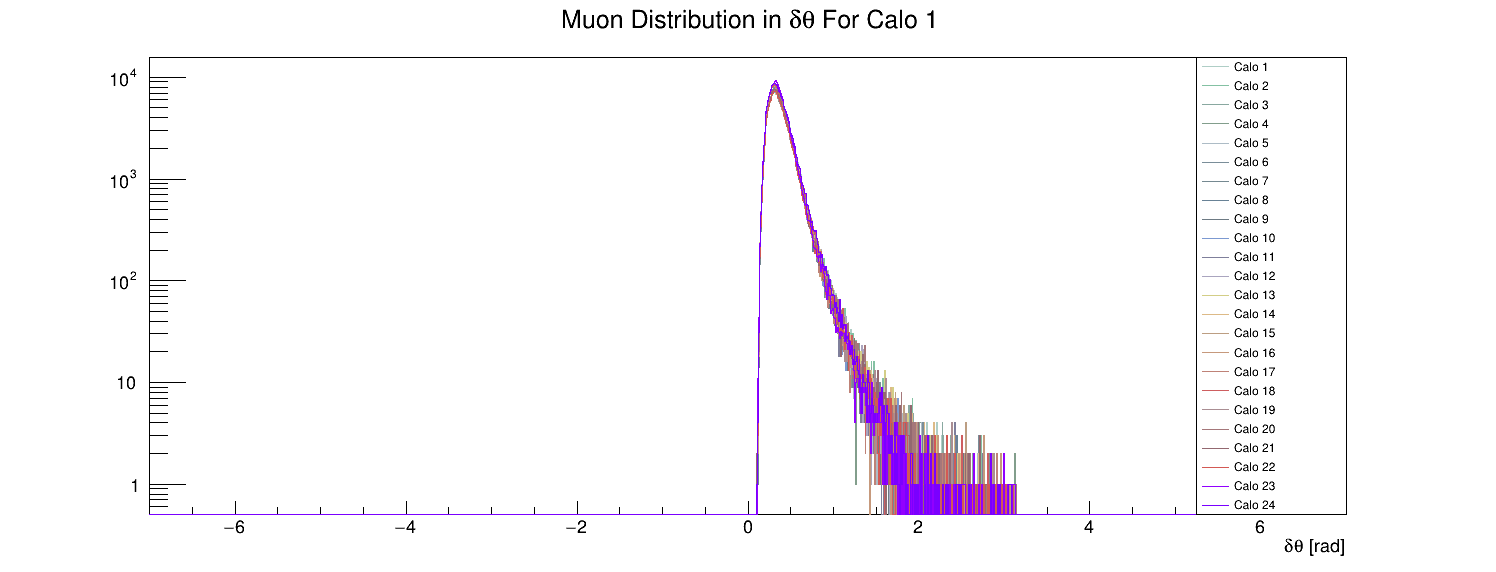

In [80]:
c = r.TCanvas("c","c",1500,600)
leg = r.TLegend(0.8,0.1,0.9,0.9)
for i, hi in enumerate(deltaThetaByCaloVec):
    if(i < 1):
        hi.Draw()
    else:
        hi.Draw("SAME")
    leg.AddEntry(hi, "Calo "+str(i+1),"l")
    
leg.Draw()
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


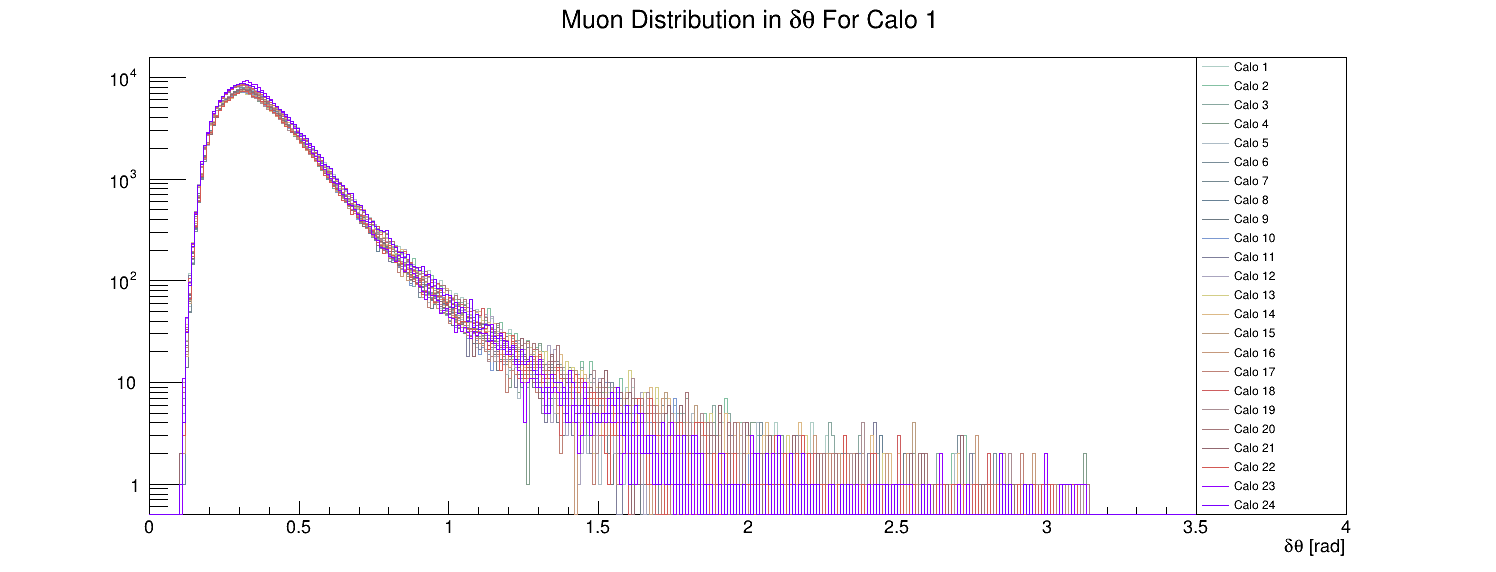

In [81]:
c = r.TCanvas("c","c",1500,600)
leg = r.TLegend(0.8,0.1,0.9,0.9)
for i, hi in enumerate(deltaThetaByCaloVec):
    hi.GetXaxis().SetRangeUser(0,4)
    if(i < 1):
        hi.Draw()
    else:
        hi.Draw("SAME")
    leg.AddEntry(hi, "Calo "+str(i+1),"l")
    
leg.Draw()
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


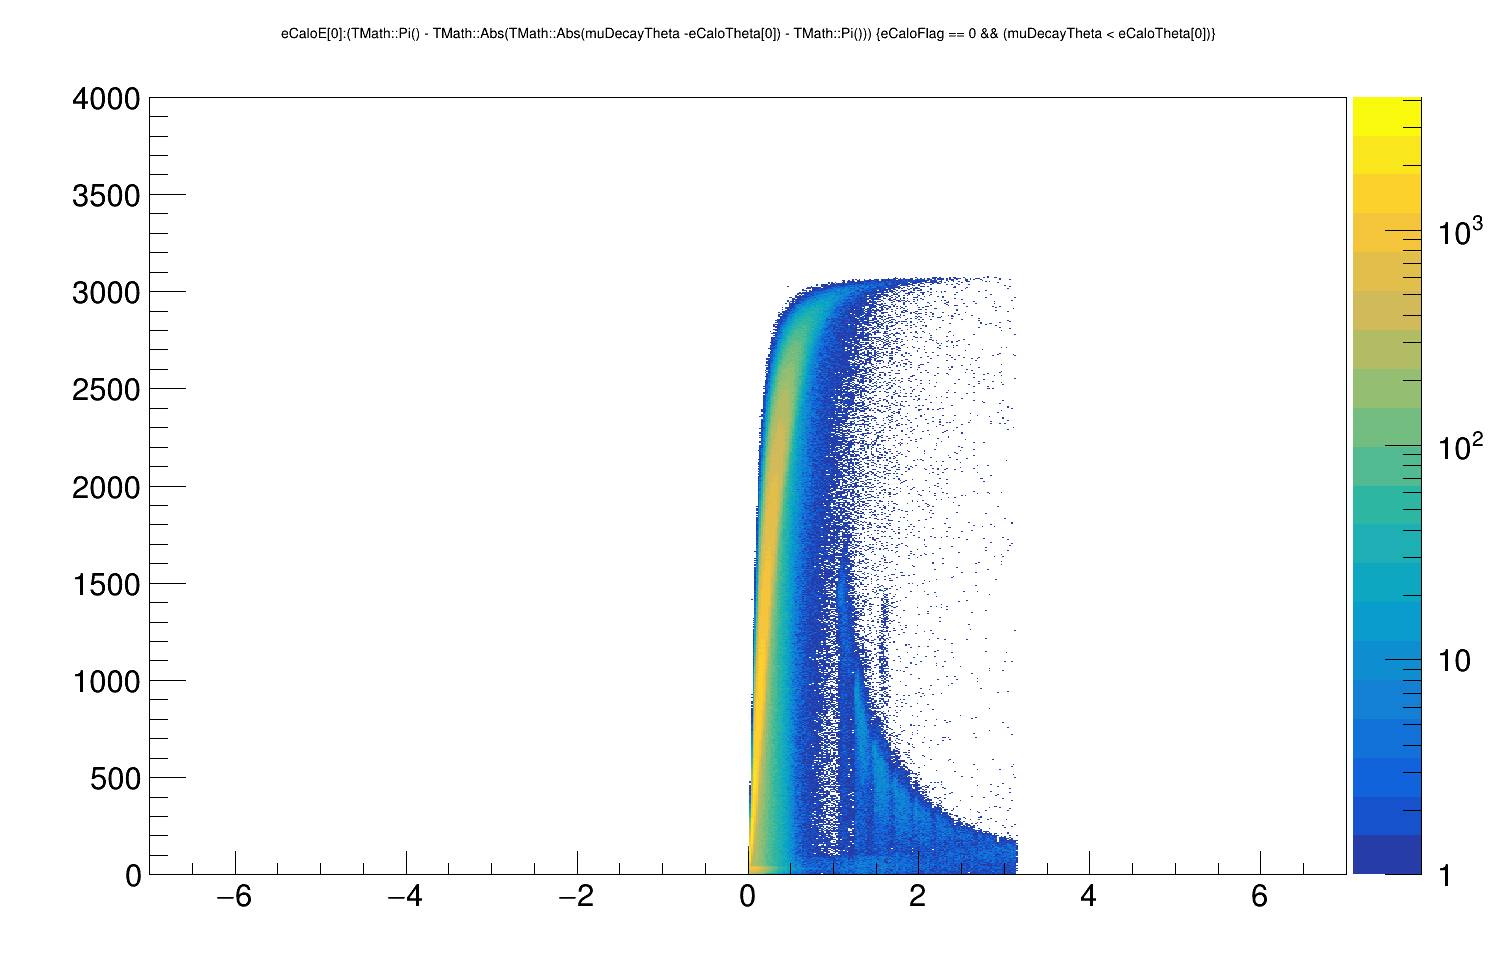

In [82]:
c = r.TCanvas("c","c",1500,1000)
t.Draw("eCaloE[0]:(TMath::Pi() - TMath::Abs(TMath::Abs(muDecayTheta -eCaloTheta[0]) - TMath::Pi()))>>hist(700,-7,7,4000,0,4000)",
       "eCaloFlag == 0 && (muDecayTheta < eCaloTheta[0])","colz")
c.SetLogz()
c.Draw()

In [83]:
[x for x in c.GetListOfPrimitives()]
h6 = c.GetPrimitive("hist").Clone("h6")

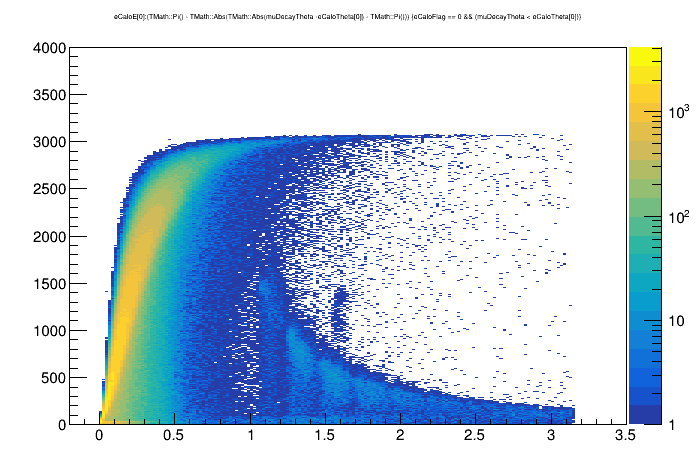

In [84]:
c = r.TCanvas()
h6.GetXaxis().SetRangeUser(-0.2,3.5)
h6.Draw("colz")
c.SetLogz()
c.Draw()

In [85]:
a1 = 0
a2 = r.TMath.Pi()*1.5
(r.TMath.Pi() - r.TMath.Abs(r.TMath.Abs(a1 -a2) - r.TMath.Pi()))

1.5707963267948966